In [407]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  
pd.set_option("display.precision", 8)

In [408]:
#we assume risk free rate remains stable at 0.13
R_f = 0.13

In [409]:
#load data
industry_portfolio_df = pd.read_excel('Industry_Portfolios.xlsx')
industry_portfolio_df = industry_portfolio_df.drop(['Date'],axis =1)
market_portfolio_df = pd.read_excel('Market_Portfolio.xlsx')
market_portfolio_df = market_portfolio_df.drop(['Date'],axis =1)
concated_df = pd.concat([industry_portfolio_df,market_portfolio_df],axis=1)
concated_df_mean = concated_df.mean().to_numpy()
concated_excess_df = concated_df - R_f

c:\Users\kilo\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\kilo\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [410]:
# regression for market model
market_model_result =[]
for n,portfolio in enumerate(concated_excess_df.columns):
    y = concated_excess_df[portfolio].to_numpy()
    x = concated_excess_df['Market'].to_numpy()
    market_model_result.append(np.polyfit(x,y,1)[::-1])

In [411]:
# regression result output
regression_result = np.column_stack((concated_excess_df.columns, market_model_result))
regression_result_df = pd.DataFrame(regression_result)\
    .rename(columns={0:'portfolio excess',1:'y intercept',2:'slope'})
regression_result_df

,portfolio excess,y intercept,slope
0,NoDur,0.36944288,0.65264736
1,Durbl,-0.41559908,1.64853565
2,Manuf,0.15977083,1.1698463
3,Enrgy,0.50171857,0.96984996
4,HiTec,-0.06401953,1.13296944
5,Telcm,0.19469093,0.90072925
6,Shops,0.27549215,0.8264924
7,Hlth,0.23784119,0.6730357
8,Utils,0.44458462,0.5380861
9,Other,-0.38713452,1.20730946


## SECURITY MARKET LINE ! ##

In [412]:
#prepare data for security market line
sml_data = np.column_stack((concated_excess_df.columns,\
                            regression_result_df['slope'].to_numpy(),\
                            concated_df.mean().to_numpy() ))
sml_data_df = pd.DataFrame(sml_data).rename(columns={0:'portfolio name',1:'estimated beta from regression',2:'portfolio mean'})
sml_data_df

,portfolio name,estimated beta from regression,portfolio mean
0,NoDur,0.65264736,0.90283333
1,Durbl,1.64853565,0.73333333
2,Manuf,1.1698463,1.01283333
3,Enrgy,0.96984996,1.23116667
4,HiTec,1.13296944,0.76625
5,Telcm,0.90072925,0.88141667
6,Shops,0.8264924,0.91633333
7,Hlth,0.6730357,0.78383333
8,Utils,0.5380861,0.90716667
9,Other,1.20730946,0.48908333


In [413]:
# regression for SML
sml_x = list(sml_data_df['estimated beta from regression'].to_numpy())
sml_y = list(sml_data_df['portfolio mean'].to_numpy())
sml_result = np.polyfit(sml_x,sml_y,1)
sml_slope = sml_result[0]
sml_intercept = sml_result[1]

In [414]:
#create y points for SML graph plotting
possible_beta  = np.arange(0,2.01,0.01)
sml_return = []
for x in possible_beta:
    y = sml_intercept + sml_slope * x
    sml_return.append(y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


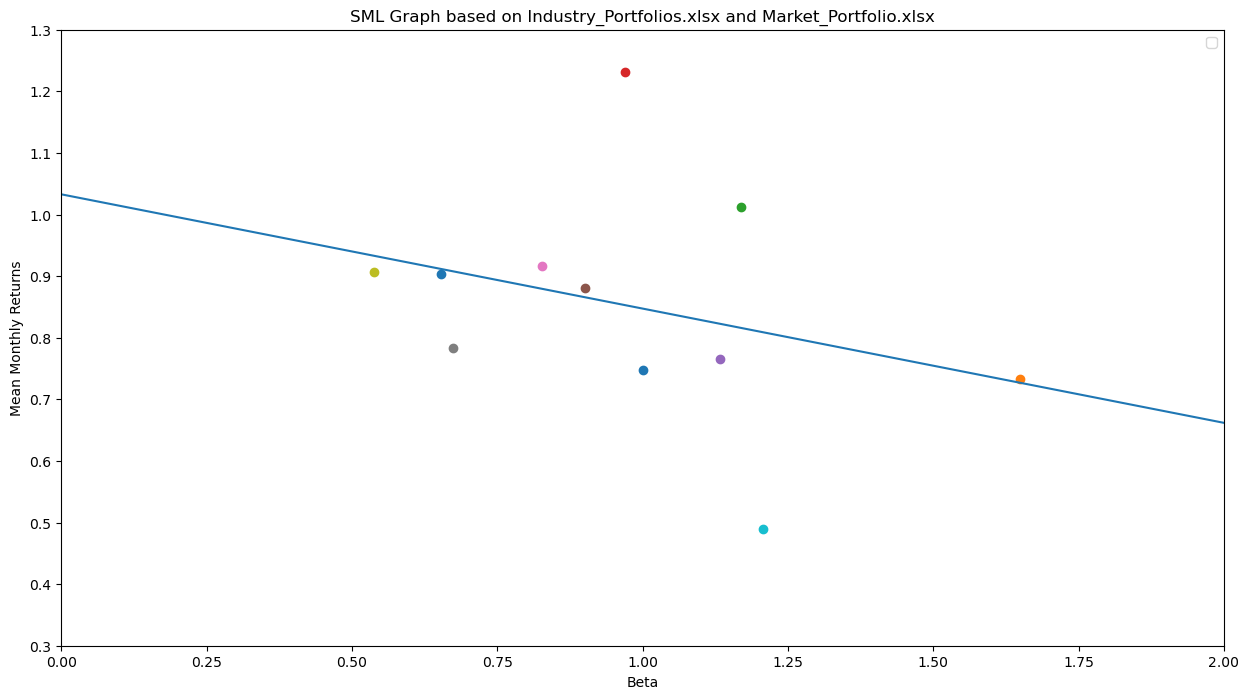

In [419]:
f1,ax1 = plt.subplots(1,figsize=(15, 8))
#ax1.set(xlim=(0,2), ylim=(0,1.5), aspect='equal')
ax1.plot(possible_beta,sml_return )
ax1.legend()
ax1.xaxis.set_major_locator(plt.MultipleLocator(0.25))
ax1.yaxis.set_major_locator(plt.MultipleLocator(0.10))
ax1.set(xlim=(0,2),ylim=(0.3,1.3))
ax1.set_xlabel('Beta')
ax1.set_ylabel('Mean Monthly Returns')
ax1.set_title('SML Graph based on Industry_Portfolios.xlsx and Market_Portfolio.xlsx')

for port_x,port_y,label in list(zip(sml_x,sml_y,sml_label)) :
    ax1.scatter(port_x, port_y)
plt.show(f1)
f1.savefig('sml.jpg')

In [ ]:
#fun experiment, lets do multiple subplots !
plt.figure(figsize=(30, 20))
for n,portfolio in enumerate(concated_excess_df.columns):
    #add new subplots
    ax = plt.subplot(4,3,n+1)
    ax.scatter(concated_excess_df[portfolio],concated_excess_df['Market'])
    # chart formatting
    ax.set_title(portfolio.upper())
    ax.set_xlabel("")
    #ax.set_xlim(xmin=0)
    #ax.set_ylim(ymin=0)
    ax.set(xlim=(-15,15), ylim=(-15,15), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)